In [5]:
import sys
sys.path
sys.path.insert(1,'./packages')


#Imports
from __future__ import division, print_function

from keras.callbacks import Callback
from keras.layers import Dense, Activation, Dropout
from keras.models import Sequential
from keras.optimizers import SGD, RMSprop
from keras.regularizers import l2
from keras.utils import np_utils

from sklearn import datasets
from sklearn.cross_validation import train_test_split
# from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
# from sklearn.model_selection import GridSearchCV
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [30]:
class prediction:

    def RF(X, Y, cv):
        """ Predict trait using Random Forest """
        numberTrees = 100

        Y_TRUE = []
        Y_PRED = []
        Y_TRUE_train = []
        Y_PRED_train = []

        mse = []
        r2 = []

        for train_index, test_index in kf.split(X):
            #print("TRAIN:", train_index, "TEST:", test_index)
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = Y[train_index], Y[test_index]

        # Build and fit the RF Regressor 
        model = RandomForestRegressor(n_estimators=numberTrees, min_samples_leaf = 5, min_samples_split=20, max_depth = 10, max_features=0.33, random_state=42) 

        model.fit(X_train, y_train)

        # Make predictions (test and training sets)
        y_pred = model.predict(X_test)
        y_pred_train = model.predict(X_train)


        Y_TRUE = np.append(Y_TRUE, y_test)
        Y_PRED = np.append(Y_PRED, y_pred)
        Y_TRUE_train = np.append(Y_TRUE_train, y_train)
        Y_PRED_train = np.append(Y_PRED_train, y_pred_train)

        mse = np.append(mse, (mean_squared_error(y_test, y_pred)))
        r2 = np.append(r2, (r2_score(y_test, y_pred)))

        return Y_TRUE, Y_PRED, Y_TRUE_train, Y_PRED_train, mse, r2
            
    def NN(X, Y):
            """ Predict trait using Neural Networks """
            Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.2, random_state=0)
            Xtrain, Xval, Ytrain, Yval = train_test_split(Xtrain, Ytrain, test_size=0.2, random_state=0)
            print(Xtrain.shape, Xval.shape, Xtest.shape, Ytrain.shape, Yval.shape, Ytest.shape)
            print('Training data')
            print(Xtrain[:,0])
            print(Ytrain)
            # print(Ytest)
            # NN structure
            model = Sequential()
            model.add(Dense(30, input_dim=8, activation='sigmoid',bias=True))
            model.add(Dense(20, input_dim=8, activation='sigmoid',bias=True))
            model.add(Dense(20, input_dim=8, activation='sigmoid',bias=True))
            model.add(Dense(20, input_dim=8, activation='sigmoid',bias=True))
            model.add(Dense(1, input_dim=8, activation='sigmoid',bias=True))
            # training rate
            sgd = SGD(lr=5)
            model.compile(loss='mean_squared_error', optimizer=sgd, metrics=['accuracy'])
            model.summary()
            history = LossHistory()
            # train NN model
            model.fit(Xtrain, Ytrain, batch_size=20, nb_epoch=100, shuffle=True, validation_data=(Xval, Yval), callbacks=[history])
            
            
            
            # Plot
            plt.figure(1,figsize=(15, 5))
            plt.subplot(121)
            plt.plot(range(len(history.losses)), history.losses)
            plt.xlabel("batch")
            plt.ylabel("loss")
            plt.grid()

            plt.subplot(122)
            plt.plot(range(len(history.accuracies)), history.accuracies)
            plt.xlabel("batch")
            plt.ylabel("acc")
            plt.grid()


plt.show()
            
            
class LossHistory(Callback):
    def on_train_begin(self, logs={}):
        self.losses = []
        self.accuracies = []
    def on_batch_end(self, batch, logs={}):
        self.losses.append(logs.get("loss"))
        self.accuracies.append(logs.get("acc"))

(204, 8) (52, 8) (65, 8) (204,) (52,) (65,)
Training data
[-5.17187786  2.22547736 -2.84802066  2.68580337 -2.32267297  2.21408802
 -6.88893955 -0.05468226 -6.32244727 -3.78586087 -5.06742783  2.67529116
  0.64473255  3.63241001 -0.99458858  3.07838537 -3.43459855 -3.42560418
 -6.30273855  0.68682184  3.50692003  3.77639534  1.80686466 -8.86249427
 -4.23578789  4.56263893 -2.83700379 -3.84792939  1.34627645  1.23354781
 -3.69176834 -1.48319485 -0.04561119  4.23046348 -1.43683618  7.66155535
  5.96443255 -6.91195953  3.07954976 -7.31333463  8.11997578  1.67962668
 -4.56950214 -5.6765002  -3.93176513  6.02021762 -1.05490438  6.98499847
 -5.19529374  0.27654057  8.14094318  3.7746723   2.91020136  8.8645578
  0.02741101  8.5904588   3.78534081 -2.65646218  6.93409343  1.93830082
  8.98704418 -1.45722176 -4.79524769 -4.33936864  4.82814797 -4.63781949
  2.00893784  2.33416156  1.68385915 -5.138189    1.93374467 -3.99217696
  3.13251523  2.28213783 -2.88674155  4.35237813  4.51116441 -1.096

204/204 [==============================] - 0s - loss: 8702677.1176 - acc: 0.0000e+00 - val_loss: 8527276.2308 - val_acc: 0.0000e+00
Epoch 19/100
204/204 [==============================] - 0s - loss: 8702677.3824 - acc: 0.0000e+00 - val_loss: 8527276.2308 - val_acc: 0.0000e+00
Epoch 20/100
204/204 [==============================] - 0s - loss: 8702677.2745 - acc: 0.0000e+00 - val_loss: 8527276.2308 - val_acc: 0.0000e+00
Epoch 21/100
204/204 [==============================] - 0s - loss: 8702676.9314 - acc: 0.0000e+00 - val_loss: 8527276.2308 - val_acc: 0.0000e+00
Epoch 22/100
204/204 [==============================] - 0s - loss: 8702676.9608 - acc: 0.0000e+00 - val_loss: 8527276.2308 - val_acc: 0.0000e+00
Epoch 23/100
204/204 [==============================] - 0s - loss: 8702676.9804 - acc: 0.0000e+00 - val_loss: 8527276.2308 - val_acc: 0.0000e+00
Epoch 24/100
204/204 [==============================] - 0s - loss: 8702677.1471 - acc: 0.0000e+00 - val_loss: 8527276.2308 - val_acc: 0.0000e+0

204/204 [==============================] - 0s - loss: 8702677.0980 - acc: 0.0000e+00 - val_loss: 8527276.2308 - val_acc: 0.0000e+00
Epoch 75/100
204/204 [==============================] - 0s - loss: 8702677.0686 - acc: 0.0000e+00 - val_loss: 8527276.2308 - val_acc: 0.0000e+00
Epoch 76/100
204/204 [==============================] - 0s - loss: 8702677.0588 - acc: 0.0000e+00 - val_loss: 8527276.2308 - val_acc: 0.0000e+00
Epoch 77/100
204/204 [==============================] - 0s - loss: 8702676.9902 - acc: 0.0000e+00 - val_loss: 8527276.2308 - val_acc: 0.0000e+00
Epoch 78/100
204/204 [==============================] - 0s - loss: 8702677.2353 - acc: 0.0000e+00 - val_loss: 8527276.2308 - val_acc: 0.0000e+00
Epoch 79/100
204/204 [==============================] - 0s - loss: 8702677.3824 - acc: 0.0000e+00 - val_loss: 8527276.2308 - val_acc: 0.0000e+00
Epoch 80/100
204/204 [==============================] - 0s - loss: 8702677.2549 - acc: 0.0000e+00 - val_loss: 8527276.2308 - val_acc: 0.0000e+0

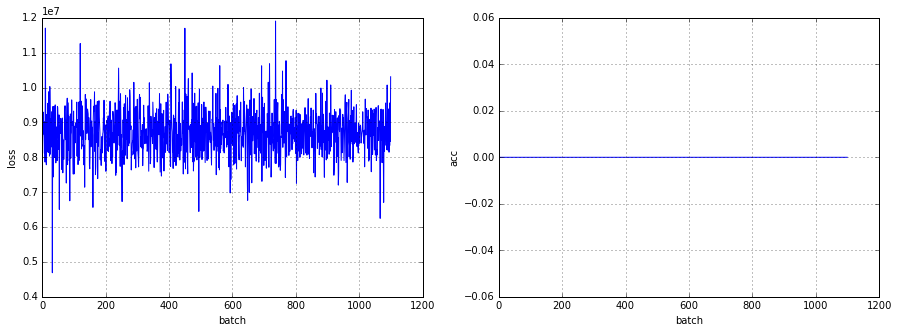

In [31]:
# Main function


FS = "False"

# Path to Genotype File
G = 'genotype_PCA_30p_1200Kb.csv'
# Path to Phenotype File
P = 'corrected_RYT2012DS_plotdata_by_GHID.csv'
# Column name for trait to use in Phenotype File
T = 'Plot_Yld'
# Prediction method to use
M = 'NN'    


 ### Data pre-processing ### 
genotype_file = pd.read_csv(G, index_col = "Entry")
phenotype_file = pd.read_csv(P)

# Average pheotype values for each line
grouped = phenotype_file.groupby(['GHID'])[T].agg([np.average]).reset_index()
grouped = grouped.set_index("GHID")

# Merge genotype and phenotype files by line name (GHID/Entry)
df = pd.concat([grouped, genotype_file], axis=1, join='inner')

# Drop rows that don't have trait value
df = df.dropna(subset=["average"], how = "any")

# Make X & Y for machine learning
X = df.drop('average', axis=1).values  
Y = df.loc[:, 'average'].values

# kf = KFold(n_splits=10, random_state = 42)   # set k-fold number

  
#if FS == "True" or FS == "T" or FS == "true": 
#    X = prediction.FeatSel(X,Y)

# prediction
    
if M == "RF" or M == "RandomForest":
    from sklearn.ensemble import RandomForestRegressor
    Y_TRUE, Y_PRED, Y_TRUE_train, Y_PRED_train, mse, r2 = prediction.RF(X, Y, kf)

elif M == "NN" or M == "NeuralNetworks":
    prediction.NN(X, Y)

elif M == "SVM" or M == "svm":
    from sklearn import svm
    Y_TRUE, Y_PRED, Y_TRUE_train, Y_PRED_train, mse, r2  = prediction.SVM(X, Y, kf)
    
else:
    print("Prediction method not available in this script")